In [1707]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from geopy import distance as geo
from sklearn import metrics
#Import for project
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score#Import for project
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math
import datetime as dt 


In [1447]:
#load data set 
df = pd.read_csv(r"\..\output_data\transformed_full.csv", index_col=0)


weather = pd.read_csv(r"\..\data\frankfurt_weather_data2019.csv", sep=",", index_col=0)

# calculate durantion between center point of downtown and
down_town = pd.DataFrame(data=[["point A", 8.683319091796875, 50.110285930959314]],
                                columns=["Describtion", "long", "latitude"])
     
    
location_Uni = pd.DataFrame(data=[["point A", 8.692339207868319, 50.130519449999994]],
                                columns=["Describtion", "long", "latitude"])
 

In [1448]:
    # calculate durantion between center point of univer. and trip end classifi
    distance_begin = pd.Series(index=df.index, data=list(map(
        lambda x: geo.distance(tuple(location_Uni.loc[0]["long":"latitude"]),
                               tuple((df.loc[x]["Start_Longitude"], df.loc[x]["Start_Latitude"]))).km, df.index)))
    distance_end = pd.Series(index=df.index, data=list(map(
        lambda x: geo.distance(tuple(location_Uni.loc[0]["long":"latitude"]),
                               tuple((df.loc[x]["End_Longitude"], df.loc[x]["End_Latitude"]))).km, df.index)))
    
    distance_DT = pd.Series(index=df.index, data=list(map(
        lambda x: geo.distance(tuple(down_town.loc[0]["long":"latitude"]),
                               tuple((df.loc[x]["End_Longitude"], df.loc[x]["End_Latitude"]))).km, df.index)))
    
    

In [1449]:
    # creat data frame for target 
    Dist = pd.DataFrame(distance_begin)
    
    # Create target column
    Dist["end_d"] = distance_end
    Dist["uni"] = Dist[0] > Dist["end_d"]
    Dist["uni"] = Dist["uni"].astype(int)
    df = Dist.join(df)

In [1450]:
    df["weather"] = 0
    
    # Format date to other format "2019-20-01 00:00:00 to 2019200100"
    df["date"] = df["Start_Time"].astype(str).str.replace("-","")
    df["date"] = df["date"].str.replace(":*:.*","")
    df["date"] = df["date"].str.replace("\s","")
    
    # set temp to datetype string
    weather.index = weather.index.astype(str)

    #Join weather dates to predictor matrix 
    df = df.join(weather, on="date" ,how="inner")
    
    #create weather feature 
    df["weather"] = df["hourly temperatur"] > 5 & (df["Rainfall"] == 0)
    df.drop(columns=["relative humidity", "Rainfall", "SD_SO", "V_VV"],inplace=True)
    df["weather"] = df["weather"].astype(int)
    df
    
    
    
    

,0,end_d,uni,Bike_number,Start_Time,End_time,Start_Longitude,Start_Latitude,End_Longitude,End_Latitude,Start_Station,End_Station_number,Weekday,Duration,Bikes_on_position,End_Bikes,Zip_codes,weather,date,hourly temperatur
27,15.685492,15.576618,1,11451,2019-05-30 15:42:00,2019-05-30 17:22:00,8.553437,50.101748,8.554450,50.101711,4291.0,0.0,True,100.0,5,1,65929,1,2019053015,20.1
22130,15.685492,15.572969,1,38089,2019-05-30 15:43:00,2019-05-30 17:20:00,8.553437,50.101748,8.554479,50.101733,4291.0,0.0,True,97.0,4,1,65929,1,2019053015,20.1
32318,4.388720,8.134838,0,38137,2019-05-30 15:42:00,2019-05-30 16:08:00,8.659075,50.108778,8.637696,50.081042,0.0,0.0,True,26.0,1,1,60329,1,2019053015,20.1
45697,4.268353,6.818889,0,38198,2019-05-30 15:05:00,2019-05-30 15:16:00,8.668331,50.100153,8.649362,50.086095,4209.0,4135.0,True,11.0,4,5,60596,1,2019053015,20.1
59767,2.053770,6.069914,0,38267,2019-05-30 15:06:00,2019-05-30 15:28:00,8.679049,50.117486,8.643708,50.104957,4237.0,4195.0,True,22.0,5,4,60322,1,2019053015,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176032,1.787325,2.878442,0,38995,2019-12-25 12:13:00,2019-12-25 12:23:00,8.687546,50.115009,8.671153,50.115329,4247.0,4243.0,True,10.0,6,1,60313,1,2019122512,8.2
176050,3.078361,1.829000,1,38996,2019-02-14 02:06:00,2019-02-14 02:29:00,8.674521,50.109030,8.708392,50.126528,4242.0,4255.0,True,23.0,2,5,60329,0,2019021402,0.9
176276,3.179044,1.452075,1,38996,2019-07-26 04:53:00,2019-07-26 05:10:00,8.664136,50.136095,8.691894,50.143707,4276.0,0.0,True,17.0,2,1,60320,1,2019072604,24.6
176450,0.820865,1.297919,0,38997,2019-04-08 00:27:00,2019-04-08 00:33:00,8.692680,50.123068,8.701279,50.122879,4250.0,4251.0,True,6.0,5,4,60316,1,2019040800,13.6


In [1451]:
    # stardistanz/extract, hour, month,
    df["date"] = df["Start_Time"].astype(str).str.replace("-", "")
    df["date"] = df["date"].str.replace(":*:.*", "")
    df["date"] = df["date"].str.replace("\s", "")

    # Create intervalls for hours
    df["hour"] = df["date"].astype(str).str.extract("([0-9]{2}$)").astype(int)

    # exctract month
    df["month"] = df["date"].astype(str).str.extract("(^[0-9]{6})").astype(int)
    df["month"] = df["month"].astype(str).str.extract("([0-9]{2}$)").astype(int)
    
    # extract day of year and week
    df["day_of_year"] = pd.to_datetime(df["Start_Time"]).dt.strftime('%u').astype(int)
    df["week"] = pd.to_datetime(df["Start_Time"]).dt.strftime('%W').astype(int)


In [1452]:
    # create zip code feature for border quarter and student quarters
    df["Borderdistrict"] = df["Zip_codes"].isin([60314, 60598, 60594, 63067, 60316, 60389])
    df["Student_quarter"] = df["Zip_codes"].isin([60385, 60487, 60385, 60326, 60486, 6028, 60327, 60488, 60487, 65929])

    # Set values to int
    df["Student_quarter"] = df["Student_quarter"].astype(int)
    df["Borderdistrict"] = df["Borderdistrict"].astype(int)
    df["Weekday"] = df["Weekday"].astype(int)

   

In [1453]:
    # create dummy featurre out of month 
    month = pd.get_dummies(df["month"], drop_first=True)
    month.columns = ["FE", "MA", "AP", "MA", "JU", "AU", "SE", "OC", "NO", "DE", "JU"]
    df = df.join(month)

In [1454]:
# create zipcode feature 

zipcodes = df["Zip_codes"].value_counts()

for plz in zipcodes.index:
    for i in range(0,52):
        value = df[(df["uni"] == 1) & (df["Zip_codes"] == plz) & (df["week"] < i)]["uni"].count()/(df[(df["Zip_codes"] == plz) & (df["week"] < i)])["uni"].count()
        df.loc[df[(df["Zip_codes"] == plz) & (df["week"] == i)].index,"zip_pro"] = value



df.fillna(value=0, inplace= True )

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


In [1455]:
hour = df["hour"].value_counts()

for hour in hour.index:
    for i in range(0,52):
        value = df[(df["uni"] == 1) & (df["hour"] == hour) & (df["month"] < i)]["uni"].count()/(df[(df["hour"] == hour) & (df["month"] < i)])["uni"].count()
        df.loc[df[(df["hour"] == hour) & (df["month"] == i)].index,"hour_pro"] = value


df.fillna(value=0, inplace= True )


C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [1456]:
# create station feature 
Start_Station = df["Start_Station"].value_counts()

for std in Start_Station.index:
    for i in range(0,52):
        value = df[(df["uni"] == 1) & (df["Start_Station"] == std) & (df["week"] < i) ]["uni"].count()/(df[(df["Start_Station"] == std) & (df["week"] < i)])["uni"].count()
        df.loc[df[(df["Start_Station"] == std) & (df["week"] == i)].index,"Start_Station_pro"] = value


hour = df["hour"].value_counts().index



C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


,0,Weekday,weather,Borderdistrict,Student_quarter,zip_pro,Start_Station_pro
13,15.685492,1,1,0,1,0.833333,0.823529
19571,15.685492,1,1,0,1,0.833333,0.823529
28319,4.388720,1,1,0,0,0.464106,0.513687
39943,4.268353,1,1,0,0,0.547325,0.417910
52183,2.053770,1,1,0,0,0.263397,0.175182
...,...,...,...,...,...,...,...
152507,2.673466,1,0,1,0,0.000000,0.000000
153342,1.787325,1,1,0,0,0.281842,0.293561
153360,3.078361,1,0,0,0,0.483607,0.666667
153682,0.820865,1,1,1,0,0.096429,0.040000


In [1491]:
X = df

In [1492]:
# split test and training set 
x_test = X[(X["Start_Time"] <= "2019-07-31 23:59:00") & (X["Start_Time"] >= "2019-07-01 00:00:00")]
x_train = X[(X["Start_Time"] > "2019-07-31 23:59:00") | (X["Start_Time"] < "2019-07-01 00:00:00")]
           
# set target and preditor values
Y_test = x_test["uni"]
Y_train = x_train["uni"]
             
# drop target value              
x_train.drop(columns= ["uni"], inplace=True)
x_test.drop(columns= ["uni"], inplace=True)             

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [1493]:
Y_train

27        1
22130     1
32318     0
45697     0
59767     0
         ..
175103    1
176032    0
176050    1
176450    0
177094    0
Name: uni, Length: 51393, dtype: int32

In [1540]:
  
x_train["Start_Station_pro"].round(3) 
x_train["zip_pro"].round(3) 
x_test["Start_Station_pro"].round(3) 
x_test["zip_pro"].round(3) 

# drop the other columns

x_test.drop(columns=["hour_pro","Start_Longitude", "Start_Latitude","day_of_year", "week", "day_of_year","FE","AP","MA" ,"JU" ,"AU" ,"SE" ,"OC" ,"NO" ,"DE","date","hourly temperatur","Zip_codes","hour", "month","Duration", "Bikes_on_position", "End_Bikes","end_d","End_Longitude", "End_Latitude", "Start_Station" ,"End_Station_number","Bike_number", "Start_Time","End_time"], inplace=True)
x_test.fillna(value=0, inplace=True)

x_train.drop(columns=["hour_pro","Start_Longitude", "Start_Latitude","day_of_year", "week", "day_of_year","FE","AP","MA" ,"JU" ,"AU" ,"SE" ,"OC" ,"NO" ,"DE","date","hourly temperatur","Zip_codes","hour", "month","Duration", "Bikes_on_position", "End_Bikes","end_d","End_Longitude", "End_Latitude", "Start_Station" ,"End_Station_number","Bike_number", "Start_Time","End_time"], inplace=True)
x_train.fillna(value=0, inplace=True)
x_train
x_test

KeyError: "['hour_pro' 'Start_Longitude' 'Start_Latitude' 'day_of_year' 'week'\n 'day_of_year' 'FE' 'AP' 'MA' 'JU' 'AU' 'SE' 'OC' 'NO' 'DE' 'date'\n 'hourly temperatur' 'Zip_codes' 'hour' 'month' 'Duration'\n 'Bikes_on_position' 'End_Bikes' 'end_d' 'End_Longitude' 'End_Latitude'\n 'Start_Station' 'End_Station_number' 'Bike_number' 'Start_Time'\n 'End_time'] not found in axis"

In [1694]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from geopy import distance as geo
from sklearn.metrics import confusion_matrix

x_train_n, x_val, y_train_n, y_val = train_test_split(x_train, Y_train, test_size = 0.3)




st_scaler = StandardScaler()
st_scaler.fit(x_train_n)
scaled_x_train = st_scaler.transform(x_train_n)



In [1699]:
# initialte nn with 5 inputs and hidden layer 
model = keras.Sequential(
            [layers.Dense(7, activation="sigmoid", input_shape=[scaled_x_train.shape[1]]),
            layers.Dense(7, activation="sigmoid", ),
            layers.Dense(7, activation="sigmoid", ),
            layers.Dense(7, activation="sigmoid", ),
            layers.Dropout(0.1),
            layers.Dense(1)])

optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=["mae"])

In [1700]:
# set parameter for nn epochs and batch size
epochs = 20
batch_size = 4000
    
history = model.fit(scaled_x_train, y_train_n.values, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 28780 samples, validate on 7195 samples
Epoch 1/20
28780/28780 [==============================] - 1s 23us/sample - loss: 0.3155 - mae: 0.5058 - val_loss: 0.2623 - val_mae: 0.4692
Epoch 2/20
28780/28780 [==============================] - 0s 2us/sample - loss: 0.2935 - mae: 0.4739 - val_loss: 0.2425 - val_mae: 0.4755
Epoch 3/20
28780/28780 [==============================] - 0s 2us/sample - loss: 0.2705 - mae: 0.4834 - val_loss: 0.2372 - val_mae: 0.4859
Epoch 4/20
28780/28780 [==============================] - 0s 2us/sample - loss: 0.2616 - mae: 0.4823 - val_loss: 0.2323 - val_mae: 0.4726
Epoch 5/20
28780/28780 [==============================] - 0s 2us/sample - loss: 0.2526 - mae: 0.4678 - val_loss: 0.2304 - val_mae: 0.4655
Epoch 6/20
28780/28780 [==============================] - 0s 2us/sample - loss: 0.2461 - mae: 0.4661 - val_loss: 0.2243 - val_mae: 0.4660
Epoch 7/20
28780/28780 [==============================] - 0s 2us/sample - loss: 0.2393 - mae: 0.4637 - val_loss: 0.2205 - 

In [1701]:
# metrics for classification 
history_df = pd.DataFrame(history.history)
history_df


,loss,mae,val_loss,val_mae
0,0.315531,0.505847,0.262307,0.469235
1,0.293482,0.473906,0.242521,0.475525
2,0.270541,0.483442,0.237190,0.485893
3,0.261624,0.482315,0.232261,0.472611
4,0.252648,0.467781,0.230439,0.465500
5,0.246133,0.466147,0.224274,0.465989
6,0.239341,0.463666,0.220461,0.458421
7,0.233796,0.454281,0.216970,0.450524
8,0.228842,0.448245,0.213221,0.444804
9,0.225715,0.443372,0.210647,0.437363


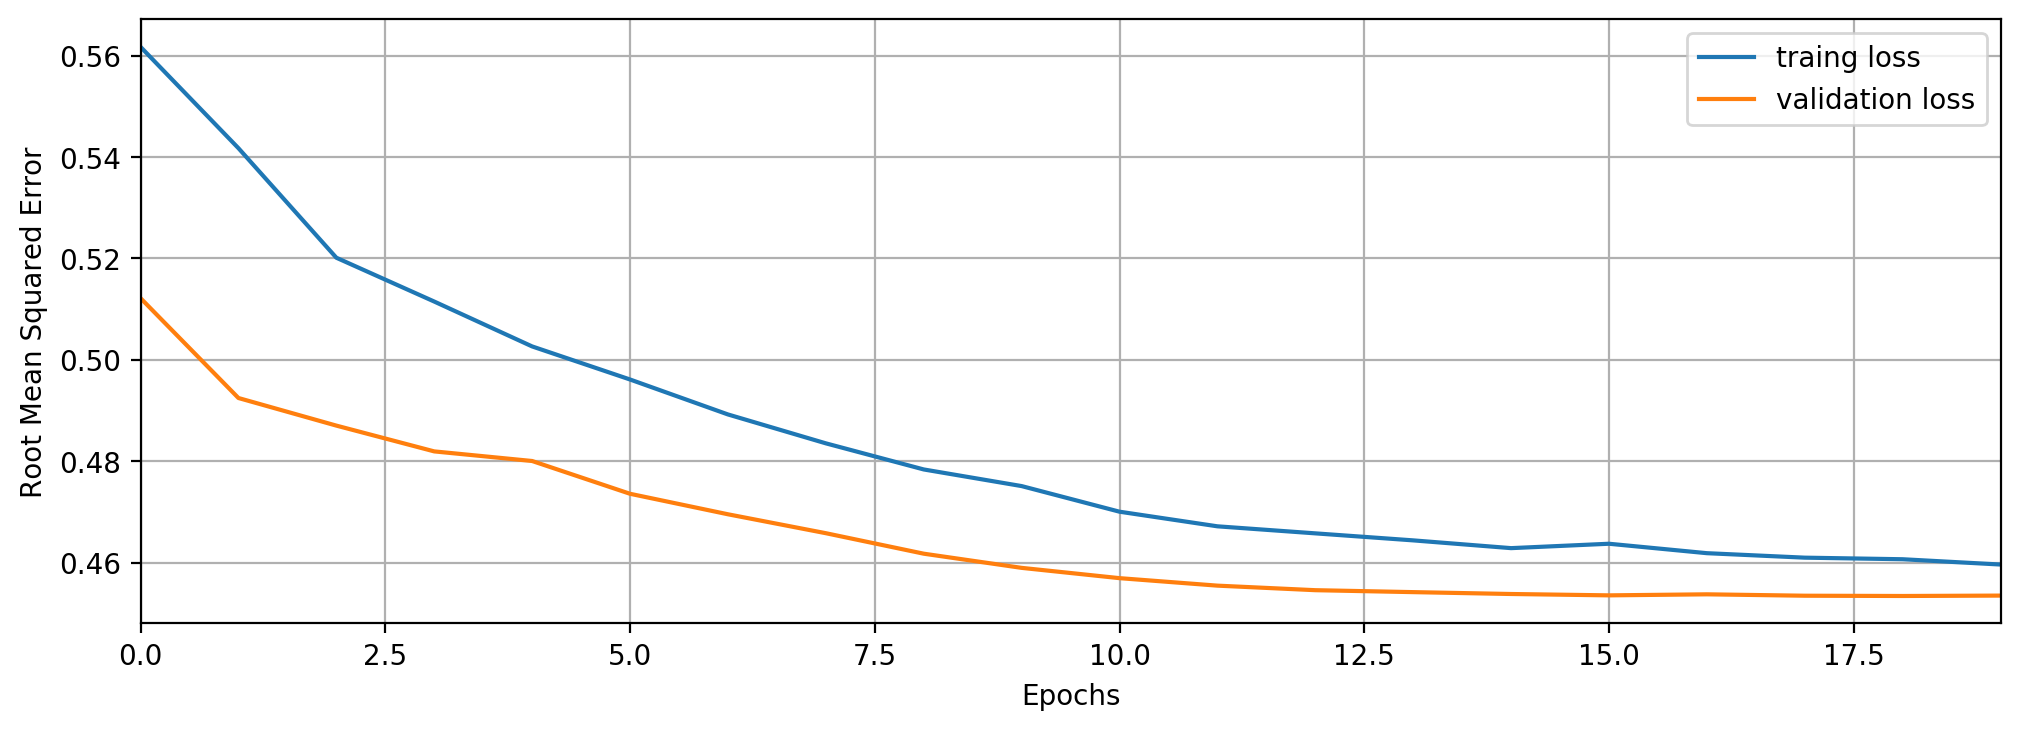

In [1702]:

    root_metrics_df = history_df[["loss", "val_mae", "mae","val_loss"]].apply(np.sqrt)
    
    root_metrics_df.rename({"rmse": "mse", "mae": "val_rmse"}, axis=1, inplace=True)
    

    #create loss plot for epochs
    fig, ax = plt.subplots(1, 1, figsize=(12, 4), dpi=200)

    ax.plot(root_metrics_df["loss"], label ="traing loss")
    ax.plot(root_metrics_df["val_loss"], label ="validation loss")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Root Mean Squared Error")
    
    ax.grid()
    ax.set_xlim([0, epochs - 1])
    ax.legend()
    plt.show()
    
    
    


In [1682]:
X_val_scaled = st_scaler.transform(X_val)
y_pred_val = model.predict(X_val_scaled)

In [1683]:
    # create confusion matrix for the validation set 
    print(confusion_matrix(y_val, y_pred.round()))

[[5160 3481]
 [4041 2736]]


In [1684]:
# accurancy of vbalidation set 
from  sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred.round())

0.5121286807627449

In [1685]:
# get prediction part for test set 
x_test_scaled = st_scaler.transform(x_test)
y_pred_test = model.predict(x_test_scaled)

In [1686]:
len(x_test)

5397

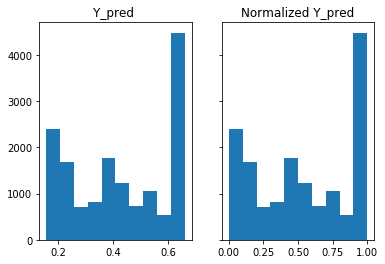

In [1687]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
Y_pred_normalized = (y_pred-min(y_pred))/(max(y_pred)-min(y_pred))
# Histogram of data and normalized dataf, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(y_pred)
ax1.set_title('Y_pred ')
ax2.hist(Y_pred_normalized)
ax2.set_title('Normalized Y_pred')
plt.show()

In [1688]:
# creating a threshold that splits the data 
Y_pred_int=[]
i=0
while i< len(Y_pred_normalized):
    if Y_pred_normalized[i]<0.5:
        Y_pred_int.append(0)
        i+=1
    else: 
        Y_pred_int.append(1)
        i+=1
        

Confusion matrix of test set 

In [1689]:
# create confusion matrix
print(confusion_matrix(Y_test, y_pred_test.round()))

[[2213 1030]
 [ 711 1443]]


In [1690]:
#equals a 0.5 throughold 
sklearn.metrics.plot_confusion_matrix
from  sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred_test.round())

0.6774133778024829

In [1706]:
metrics.plot_confusion_matrix(model, X_test, y_test)

ValueError: plot_confusion_matrix only supports classifiers

In [ ]:
import sklearn.metrics